In [5]:
library(readr) # for importing the datafile
library(afex) # for the anova
library(tidyverse) # for restructuring it
library(rstatix) # for testing assumptions
library(ggpubr) # for graphical test of normality
library(emmeans) # for post-hoc tests


In [6]:
d_long <- read.csv("resp_long_baseline.tsv", sep="\t")
names(d_long)[names(d_long) == "reso"] 
d_long


character(0)

resp,run,prob_id,time,phase,repetition,trial_type,condition,age,sex,group
<dbl>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>
-2.56,1,3,0.00,-1,0,pause,pause,23,M,Musik
1.88,1,5,0.00,-1,0,pause,pause,25,M,Musik
-3.57,1,6,0.00,-1,0,pause,pause,27,M,Musik
-2.27,1,7,0.00,-1,0,pause,pause,24,F,Sound
-2.22,1,8,0.00,-1,0,pause,pause,27,M,Sound
-4.51,1,9,0.00,-1,0,pause,pause,30,M,Sound
1.36,1,11,0.00,-1,0,pause,pause,23,F,Musik
-0.62,1,12,0.00,-1,0,pause,pause,21,F,Sound
-0.61,1,13,0.00,-1,0,pause,pause,22,F,Sound


In [8]:
d_long$type <- as.factor(d_long$trial_type)
d_long$condition <- as.factor(d_long$condition)
d_long$group <- as.factor(d_long$group)
d_long$sex <- as.factor(d_long$sex)
d_long$eda <- as.numeric(d_long$resp)
d_long$time<- as.factor(paste(d_long$run, d_long$repetition, sep = "_"))

# bad data structure. See what happens if I eliminate all rows that are "pause" in "condition"

d_long_new <- d_long[d_long$condition != "pause", ] 

In [22]:
#round(eda)
#apply(is.na(d_long_new), 2, which)

In [57]:
which(is.na(d_long_new), arr.ind = TRUE)
d_long_new = na.omit(d_long_new)

row,col


In [50]:
summary(d_long_new)

      resp            run         prob_id       time          phase      
 Min.   : 3.68   Min.   :1.0   Min.   : 3.00   1_0:   0   Min.   :0.000  
 1st Qu.:15.62   1st Qu.:1.0   1st Qu.:10.50   1_1:3936   1st Qu.:1.000  
 Median :19.18   Median :1.5   Median :16.50   1_2:3912   Median :3.000  
 Mean   :19.45   Mean   :1.5   Mean   :16.67   2_0:   0   Mean   :3.498  
 3rd Qu.:23.14   3rd Qu.:2.0   3rd Qu.:23.25   2_1:3936   3rd Qu.:6.000  
 Max.   :36.88   Max.   :2.0   Max.   :29.00   2_2:3912   Max.   :7.000  
   repetition     trial_type           condition         age        sex     
 Min.   :1.000   Length:15696       math    :7872   Min.   :21.00   F:6540  
 1st Qu.:1.000   Class :character   pause   :   0   1st Qu.:23.00   M:9156  
 Median :1.000   Mode  :character   rotation:7824   Median :24.00           
 Mean   :1.498                                      Mean   :24.08           
 3rd Qu.:2.000                                      3rd Qu.:25.00           
 Max.   :2.000      

In [191]:
# our four factors are:
# music vs sound (d_long$group, btw)
# stress vs relaxation (d_long$type, wth)
# maths vs rotation (d_long$condition, wth)
# run + repetition within run (d_long$time, wth)
# 
# covariates are:
# age (d_long$age, btw)
# gender (d_long$sex, btw)

Test assumptions

In [54]:
# 1) normality

d_long_new %>%
  group_by(time, type, condition, group) %>%
  shapiro_test(resp)

d_long_new %>%
  group_by(time, type, condition, group) %>%
  summary()

time,condition,group,type,variable,statistic,p
<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
1_1,math,Musik,relax,resp,0.9833326,8.735580e-06
1_1,math,Sound,relax,resp,0.9568434,3.223034e-10
1_1,rotation,Musik,relax,resp,0.9738596,3.726929e-08
1_1,rotation,Sound,relax,resp,0.9579096,4.700481e-10
1_1,math,Musik,stress,resp,0.9842629,1.615747e-05
1_1,math,Sound,stress,resp,0.9755010,7.021233e-07
1_1,rotation,Musik,stress,resp,0.9901794,1.264871e-03
1_1,rotation,Sound,stress,resp,0.9464420,1.072795e-11
1_2,math,Musik,relax,resp,0.9880785,2.441438e-04


      resp            run         prob_id       time          phase      
 Min.   : 3.68   Min.   :1.0   Min.   : 3.00   1_0:   0   Min.   :0.000  
 1st Qu.:15.62   1st Qu.:1.0   1st Qu.:10.50   1_1:3936   1st Qu.:1.000  
 Median :19.18   Median :1.5   Median :16.50   1_2:3912   Median :3.000  
 Mean   :19.45   Mean   :1.5   Mean   :16.67   2_0:   0   Mean   :3.498  
 3rd Qu.:23.14   3rd Qu.:2.0   3rd Qu.:23.25   2_1:3936   3rd Qu.:6.000  
 Max.   :36.88   Max.   :2.0   Max.   :29.00   2_2:3912   Max.   :7.000  
   repetition     trial_type           condition         age        sex     
 Min.   :1.000   Length:15696       math    :7872   Min.   :21.00   F:6540  
 1st Qu.:1.000   Class :character   pause   :   0   1st Qu.:23.00   M:9156  
 Median :1.000   Mode  :character   rotation:7824   Median :24.00           
 Mean   :1.498                                      Mean   :24.08           
 3rd Qu.:2.000                                      3rd Qu.:25.00           
 Max.   :2.000      

In [7]:
ggqqplot(d_long_new[group = "Musik"], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Musikbedingung') +
  facet_grid(time ~ type)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ type)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ group)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(time ~ group)


ggqqplot(d_long_new[group = 'Musik'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Musikbedingung') +
  facet_grid(time ~ type)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ type)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ group)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(time ~ group)

# qqplots show that distribution is mostly OK

ERROR: Error in `[.data.frame`(d_long_new, group = "Musik"): unused argument (group = "Musik")


In [41]:
# Installing
#install.packages("readr")
# Loading
#library("readr")

In [104]:
# 2) homogeneity of variance (only for between-subject factors)

d_long %>%
  group_by(run, phase) %>%
  levene_test(eda ~ group)
# not given, we need to correct the results.

run,phase,df1,df2,statistic,p
<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,-1,1,4150,37.1525104,1.191795e-09
1,0,1,982,65.7766487,1.497328e-15
1,1,1,982,65.0692711,2.096342e-15
1,2,1,982,74.6178079,2.284147e-17
1,3,1,982,0.4141819,5.200048e-01
1,4,1,958,17.3671741,3.359651e-05
1,5,1,982,4.9189058,2.679254e-02
1,6,1,982,32.6792811,1.441210e-08
1,7,1,982,23.3876549,1.536506e-06


In [ ]:
# 3) assumption of sphericity (only for within-subject factors)

# will be checked and corrected for automatically when computing the ANOVA. Look at that then.

Define model 

In [9]:
model1 <- aov_ez("prob_id", # Variable/column defining your participants
       "eda", # dv
       d_long, # name of your dataframe
       between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
       within = c("time", "condition", "type"), 
       include_aov = TRUE)


model1
summary(model1)

ERROR: Error: Empty cells in within-subjects design  (i.e., bad data structure).
table(data[c("time", "condition", "type")])
# , , type = pause
# 
#       condition
# time   math pause rotation
#   X1_0    0  5529        0
#   X1_1    0     0        0
#   X1_2    0     0        0
#   X2_0    0  5529        0
#   X2_1    0     0        0
#   X2_2    0     0        0
# 
# , , type = relax
# 
#       condition
# time   math pause rotation
#   X1_0    0     0        0
#   X1_1 1298     0     1298
#   X1_2 1298     0     1298
#   X2_0    0     0        0
#   X2_1 1298     0     1298
#   X2_2 1298     0     1298
# 
# , , type = stress
# 
#       condition
# time   math pause rotation
#   X1_0    0     0        0
#   X1_1 1298     0     1298
#   X1_2 1298     0     1298
#   X2_0    0     0        0
#   X2_1 1298     0     1298
#   X2_2 1298     0     1298
# 


In [9]:
# with pause excluded

model1 <- aov_ez("prob_id", # Variable/column defining your participants
                 "resp", # dv
                 d_long_new, # name of your dataframe
                 between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
                 within = c("time", "condition", "type"), 
                 include_aov = TRUE, na.rm=TRUE)
model1
summary(model1)


# we see that the assumption of sphericity was corrected for using the Greenhouse-Geisser correction
# we also see that we have an effect for time
# and for time*condition*type

Warning message:
“More than one observation per cell, aggregating the data using mean (i.e, fun_aggregate = mean)!”
Contrasts set to contr.sum for the following variables: group, sex



Anova Table (Type 3 tests)

Response: resp
                          Effect          df   MSE         F   ges p.value
1                          group       1, 20  2.07      2.93  .006    .103
2                            sex       1, 20  2.07      0.62  .001    .442
3                      group:sex       1, 20  2.07      0.26 <.001    .613
4                           time 1.55, 30.92  9.58      1.14  .015    .320
5                     group:time 1.55, 30.92  9.58      0.45  .006    .591
6                       sex:time 1.55, 30.92  9.58      0.72  .010    .460
7                 group:sex:time 1.55, 30.92  9.58      0.06 <.001    .907
8                      condition       1, 20  4.49    3.39 +  .014    .081
9                group:condition       1, 20  4.49      1.36  .006    .258
10                 sex:condition       1, 20  4.49      0.40  .002    .536
11           group:sex:condition       1, 20  4.49      0.63  .003    .438
12                          type       1, 20 14.15 46.30 

Warning message in summary.Anova.mlm(object$Anova, multivariate = FALSE):
“HF eps > 1 treated as 1”



Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

                              Sum Sq num Df Error SS den Df F value    Pr(>F)
(Intercept)                    75.79      1   41.470     20 36.5542 6.549e-06
group                           6.07      1   41.470     20  2.9269   0.10258
sex                             1.28      1   41.470     20  0.6156   0.44189
group:sex                       0.55      1   41.470     20  0.2638   0.61317
time                           16.89      3  296.226     60  1.1402   0.34020
group:time                      6.68      3  296.226     60  0.4508   0.71765
sex:time                       10.69      3  296.226     60  0.7214   0.54313
group:sex:time                  0.82      3  296.226     60  0.0555   0.98263
condition                      15.20      1   89.777     20  3.3856   0.08066
group:condition                 6.09      1   89.777     20  1.3575   0.25769
sex:condition                   1.78      1   89.777     20  0.3963   0.5361

In [79]:
summary(model1)

Warning message in summary.Anova.mlm(object$Anova, multivariate = FALSE):
“HF eps > 1 treated as 1”



Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

                              Sum Sq num Df Error SS den Df F value    Pr(>F)
(Intercept)                    75.79      1   41.470     20 36.5542 6.549e-06
group                           6.07      1   41.470     20  2.9269   0.10258
sex                             1.28      1   41.470     20  0.6156   0.44189
group:sex                       0.55      1   41.470     20  0.2638   0.61317
time                           16.89      3  296.226     60  1.1402   0.34020
group:time                      6.68      3  296.226     60  0.4508   0.71765
sex:time                       10.69      3  296.226     60  0.7214   0.54313
group:sex:time                  0.82      3  296.226     60  0.0555   0.98263
condition                      15.20      1   89.777     20  3.3856   0.08066
group:condition                 6.09      1   89.777     20  1.3575   0.25769
sex:condition                   1.78      1   89.777     20  0.3963   0.5361

In [102]:
model1$anova_table


,num Df,den Df,MSE,F,ges,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
group,1.000000,20.00000,2.073479,2.92689994,0.0055984534,1.025821e-01
sex,1.000000,20.00000,2.073479,0.61558300,0.0011826904,4.418882e-01
group:sex,1.000000,20.00000,2.073479,0.26377106,0.0005071136,6.131685e-01
time,1.545825,30.91651,9.581494,1.14017775,0.0154245988,3.201983e-01
group:time,1.545825,30.91651,9.581494,0.45082294,0.0061562530,5.912196e-01
sex:time,1.545825,30.91651,9.581494,0.72141252,0.0098150458,4.601517e-01
group:sex:time,1.545825,30.91651,9.581494,0.05550094,0.0007620117,9.074957e-01
condition,1.000000,20.00000,4.488861,3.38560360,0.0139024324,8.065811e-02
group:condition,1.000000,20.00000,4.488861,1.35746802,0.0056210356,2.576855e-01


# post hoc tests:

In [106]:
m1_ph <- emmeans(model1, "type") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m1_ph
pairs(m1_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

 type   emmean    SE df lower.CL upper.CL
 relax  -0.878 0.146 20    -1.18   -0.574
 stress  1.783 0.258 20     1.25    2.321

Results are averaged over the levels of: group, sex, condition, time 
Confidence level used: 0.95 

 contrast       estimate    SE df t.ratio p.value
 relax - stress    -2.66 0.391 20  -6.805  <.0001

Results are averaged over the levels of: group, sex, condition, time 

In [10]:
m3_ph <- emmeans(model1, "group", "type") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m3_ph
pairs(m3_ph)

type = relax:
 group emmean    SE df lower.CL upper.CL
 Musik -1.232 0.200 20   -1.650  -0.8149
 Sound -0.524 0.213 20   -0.967  -0.0802

type = stress:
 group emmean    SE df lower.CL upper.CL
 Musik  2.394 0.353 20    1.657   3.1303
 Sound  1.173 0.375 20    0.390   1.9552

Results are averaged over the levels of: sex, condition, time 
Confidence level used: 0.95 

type = relax:
 contrast      estimate    SE df t.ratio p.value
 Musik - Sound   -0.709 0.292 20  -2.427  0.0248

type = stress:
 contrast      estimate    SE df t.ratio p.value
 Musik - Sound    1.221 0.515 20   2.370  0.0280

Results are averaged over the levels of: sex, condition, time 

In [123]:
m2_ph <- emmeans(model1, "time", "type") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m2_ph
pairs(m2_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

type = relax:
 time emmean    SE df lower.CL upper.CL
 X1_1 -0.335 0.261 20   -0.879    0.209
 X1_2 -1.122 0.275 20   -1.696   -0.549
 X2_1 -0.916 0.258 20   -1.454   -0.378
 X2_2 -1.139 0.365 20   -1.900   -0.378

type = stress:
 time emmean    SE df lower.CL upper.CL
 X1_1  1.791 0.325 20    1.112    2.470
 X1_2  1.387 0.342 20    0.673    2.101
 X2_1  1.945 0.343 20    1.230    2.661
 X2_2  2.009 0.290 20    1.404    2.615

Results are averaged over the levels of: group, sex, condition 
Confidence level used: 0.95 

type = relax:
 contrast    estimate    SE df t.ratio p.value
 X1_1 - X1_2   0.7871 0.274 20   2.875  0.0428
 X1_1 - X2_1   0.5808 0.406 20   1.430  0.4961
 X1_1 - X2_2   0.8039 0.484 20   1.660  0.3695
 X1_2 - X2_1  -0.2063 0.444 20  -0.465  0.9658
 X1_2 - X2_2   0.0168 0.555 20   0.030  1.0000
 X2_1 - X2_2   0.2231 0.230 20   0.970  0.7675

type = stress:
 contrast    estimate    SE df t.ratio p.value
 X1_1 - X1_2   0.4040 0.208 20   1.942  0.2427
 X1_1 - X2_1  -0.1541 0.343 20  -0.449  0.9690
 X1_1 - X2_2  -0.2181 0.388 20  -0.562  0.9422
 X1_2 - X2_1  -0.5582 0.295 20  -1.895  0.2617
 X1_2 - X2_2  -0.6221 0.375 20  -1.659  0.3703
 X2_1 - X2_2  -0.0639 0.314 20  -0.203  0.9969

Results are averaged over the levels of: group, sex, condition 
P value adjustment: tukey method for comparing a family of 4 estimates 

In [14]:
c1 <- list(run1vsrun2 = c(1, 1, -1, -1), 
           run1wdh = c(1, -1, 1, -1)
        # this vector gives each line in the object 'm1_ph' a weight
          )

# if several contrasts are defined, these go into a list of vectors and each get their own name.
  
contrast(m2_ph, c1, adjust = "holm") # here we define how to adjust the alpha-level, specified here is the Bonferroni-Holm correction, 
                                     # which is less strict than the Bonferroni correction

# and we see: there is a difference, t(20) = 3.222, p = 0.0043

 contrast   estimate    SE df t.ratio p.value
 run1vsrun2  -0.0894 0.697 20  -0.128  0.8992
 run1wdh      0.6751 0.233 20   2.893  0.0180

Results are averaged over the levels of: group, sex, type, condition 
P value adjustment: holm method for 2 tests 

plots

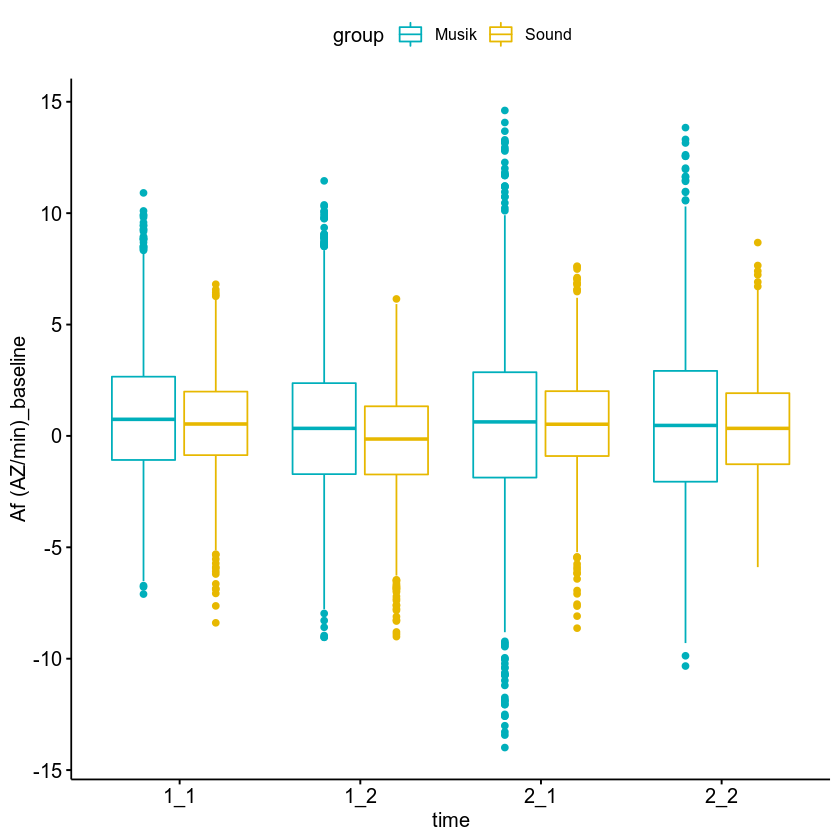

In [117]:
p_resp0 <- ggboxplot(
  d_long_new, x = "time", y = "resp" ,ylab= "Af (AZ/min)_baseline", 
  color = "group", palette = c("#00AFBB", "#E7B800")
)
p_resp0

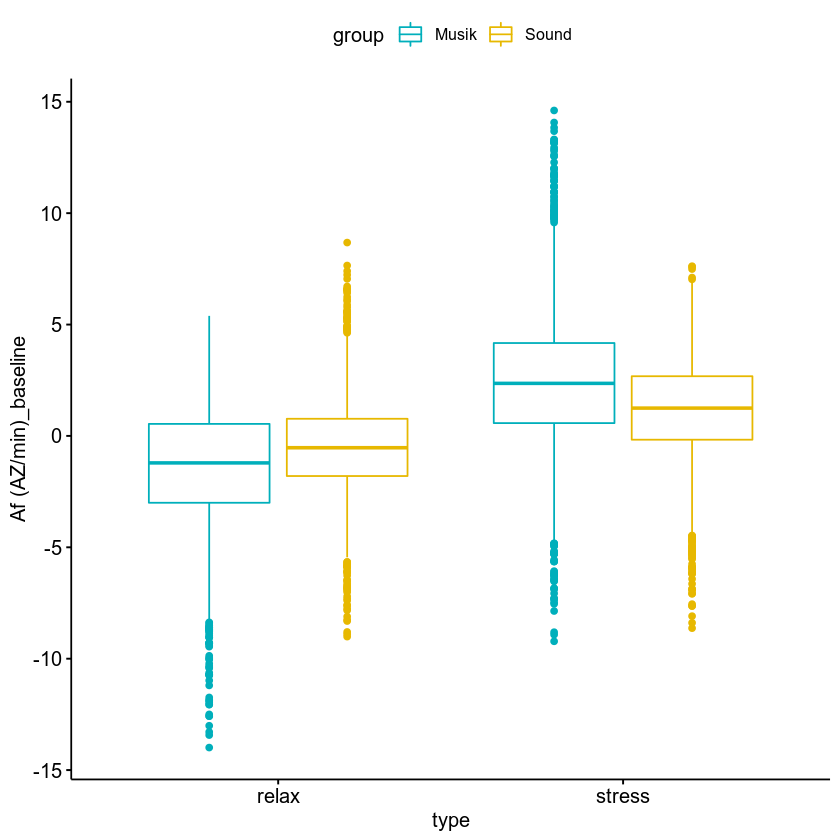

In [43]:
p_resp8 <- ggboxplot(
  d_long_new, x = "type", y = "resp" ,ylab= "Af (AZ/min)_baseline", 
  color = "group", palette = c("#00AFBB", "#E7B800")
)
p_resp8

png 
  2

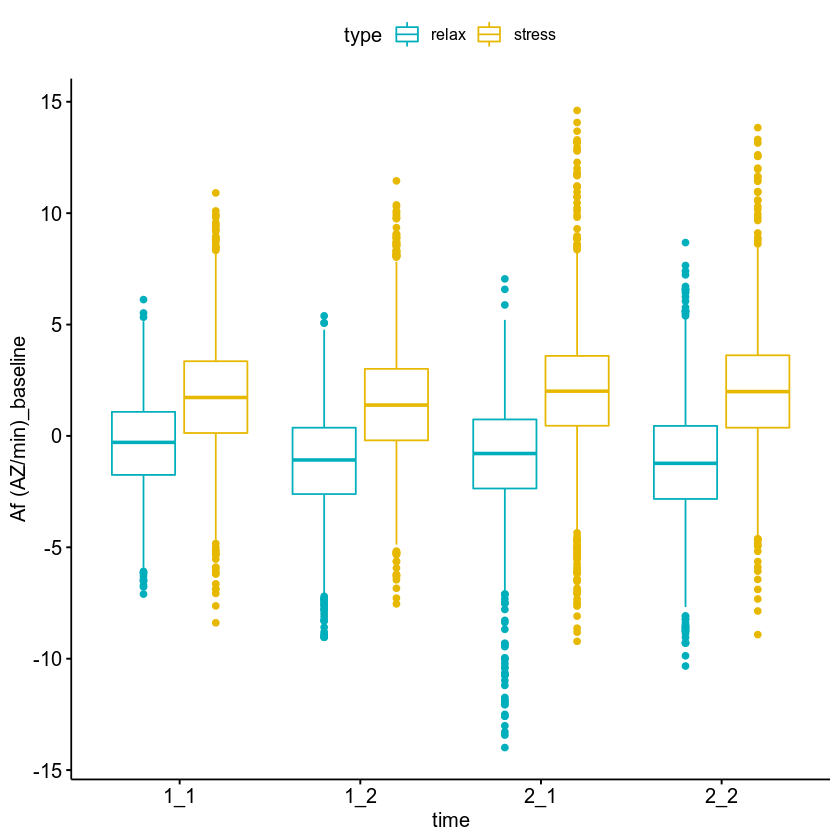

In [119]:
p_resp1 <- ggboxplot(
  d_long_new, x = "time", y = "resp" ,ylab= "Af (AZ/min)_baseline", 
  color = "type", palette = c("#00AFBB", "#E7B800")
)
p_resp1

png("plot8.png")
plot(p_resp1)
dev.off()


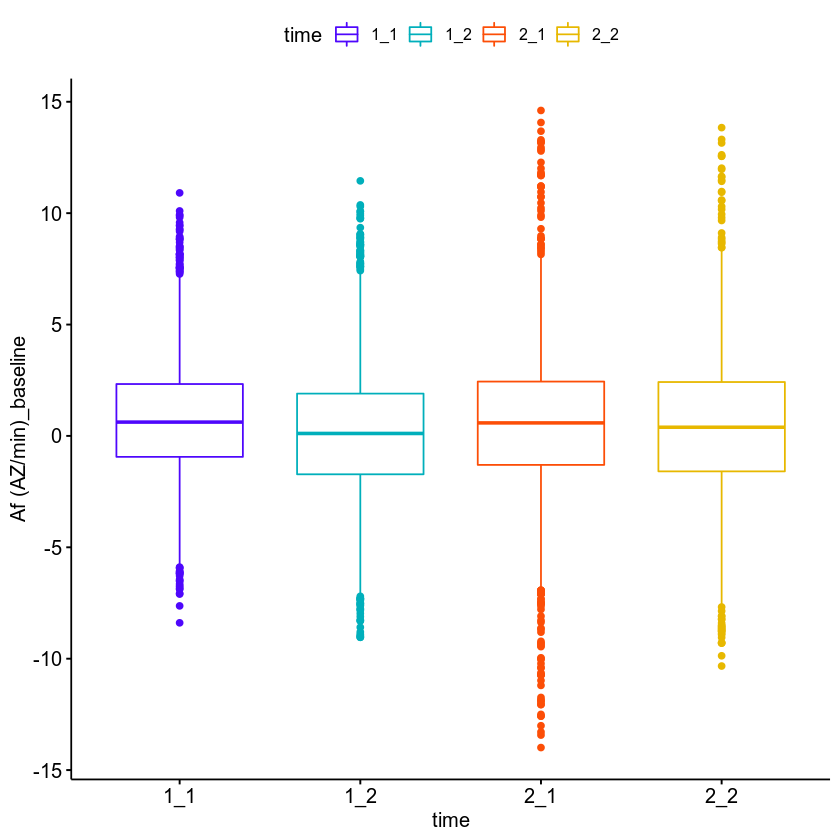

In [111]:
p_resp2 <- ggboxplot(
  d_long_new, x = "time", y = "resp" ,ylab= "Af (AZ/min)_baseline", 
  palette = c("#4e07fc","#00AFBB", "#FC4E07", "#E7B800" ), color = "time", shape = "time"
)
p_resp2


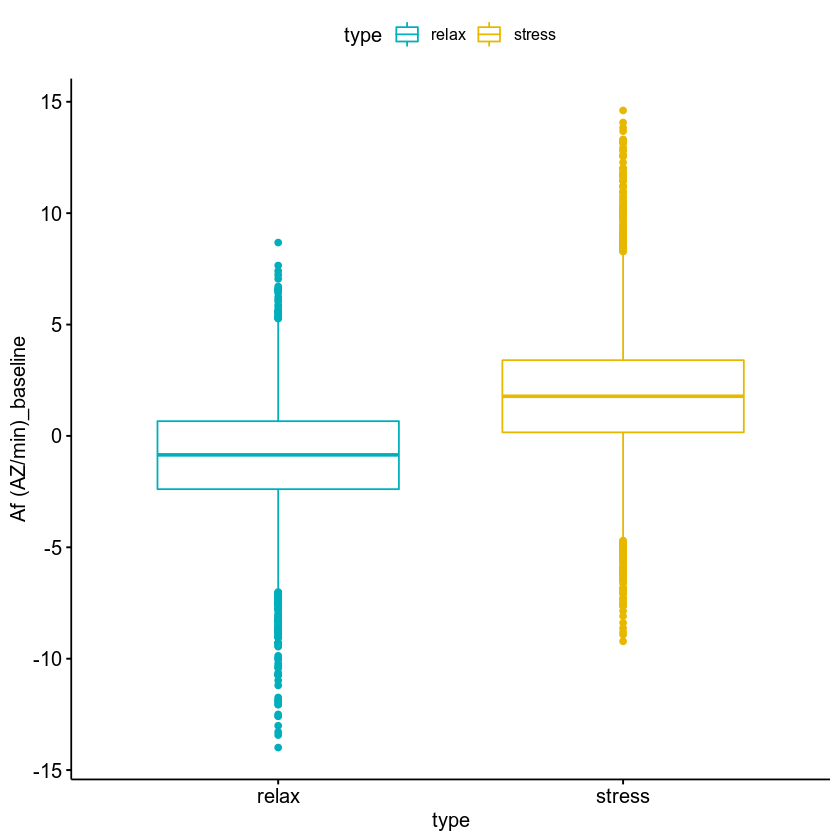

In [112]:
p_resp3 <- ggboxplot(
  d_long_new, x = "type", y = "resp" ,ylab= "Af (AZ/min)_baseline", 
  palette = c("#00AFBB", "#E7B800"), color = "type", shape = "type"
)
p_resp3

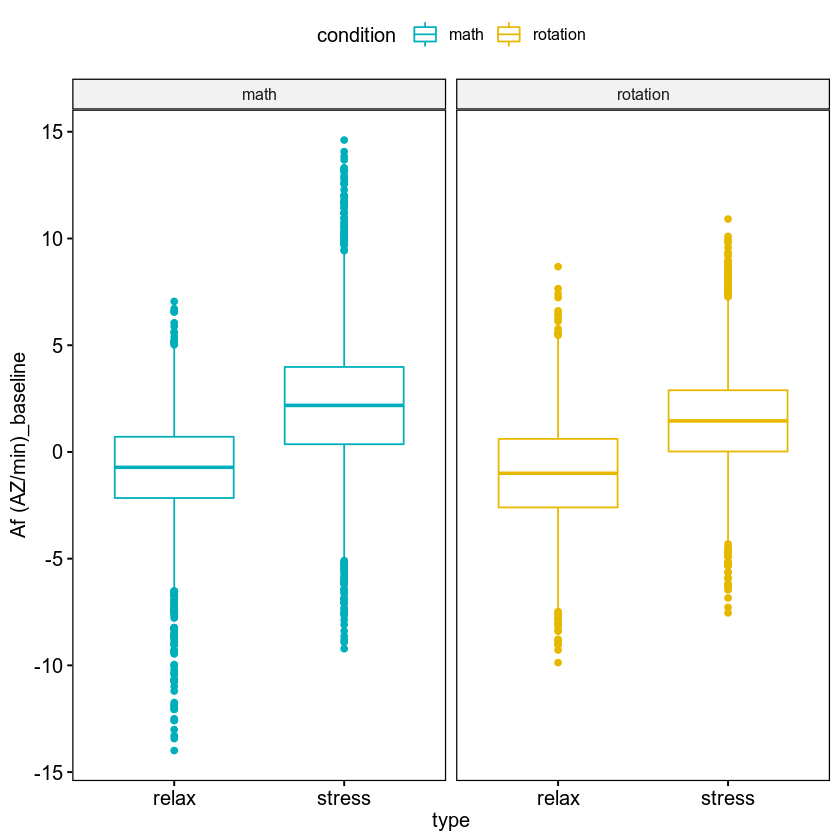

In [113]:
p_resp4  <- ggboxplot(
  d_long_new, x = "type", y = "resp", facet.by = "condition", ylab= "Af (AZ/min)_baseline", 
  color = "condition", palette = c("#00AFBB", "#E7B800")
)
p_resp4

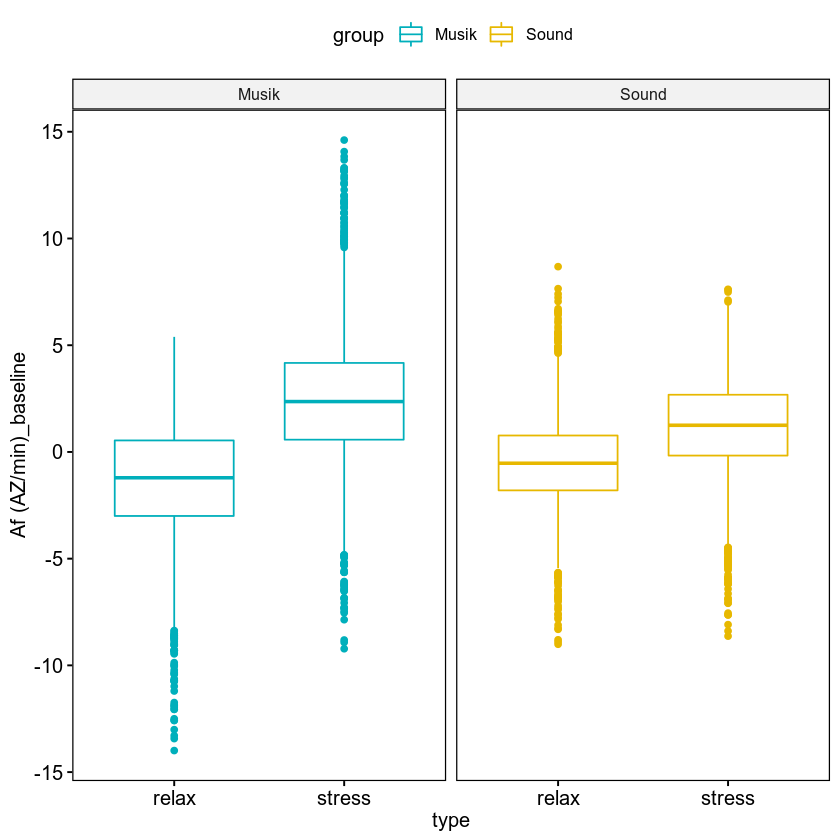

In [114]:
p_resp5  <- ggboxplot(
  d_long_new, x = "type", y = "resp", facet.by = "group", ylab= "Af (AZ/min)_baseline",
  color = "group", palette = c("#00AFBB", "#E7B800")
)
p_resp5

In [118]:
# PNG device


png("plot1.png")
plot(p_resp1)
dev.off()

png("plot2.png")
plot(p_resp2)
dev.off()

png("plot3.png")
plot(p_resp3)
dev.off()

png("plot4.png")
plot(p_resp4)
dev.off()

png("plot5.png")
plot(p_resp5)
dev.off()

png("plot6.png")
plot(p_resp0)
dev.off()

png("plot7.png")
plot(p_resp8)
dev.off()


png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2